In [31]:
import pandas as pd
import numpy as np

# Load the flow.csv file
flow = pd.read_csv('flow.csv')
flow.head()

,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient,start,end,age,state,reason,alerted,Flow_ID,Source_IP,Source_port,Destination_IP,Destination_port,protocol
0,1,0,82,0,2024-02-06T03:50:19.028531-0800,2024-02-06T03:50:19.028531-0800,0,new,timeout,False,966966916233670,10.115.108.136,58518.0,255.255.255.255,1947.0,UDP
1,1,0,82,0,2024-02-06T03:50:19.028509-0800,2024-02-06T03:50:19.028509-0800,0,new,timeout,False,966870695915051,10.115.108.136,58515.0,10.115.108.255,1947.0,UDP
2,1,0,217,0,2024-02-06T03:50:19.645434-0800,2024-02-06T03:50:19.645434-0800,0,new,timeout,False,1083270908666636,10.115.108.4,64778.0,239.255.255.250,1900.0,UDP
3,4,0,868,0,2024-02-06T03:50:23.182583-0800,2024-02-06T03:50:26.188979-0800,3,new,timeout,False,2191565829501581,10.115.108.162,52278.0,239.255.255.250,1900.0,UDP
4,4,0,872,0,2024-02-06T03:50:23.167810-0800,2024-02-06T03:50:26.174027-0800,3,new,timeout,False,2128115162280932,10.115.108.162,52275.0,239.255.255.250,1900.0,UDP


In [32]:
flow.dropna(inplace=True)


In [33]:
import pandas as pd


# Assuming 'start' and 'end' columns are timezone-aware, you can convert them to UTC
flow['start'] = pd.to_datetime(flow['start'], utc=True)
flow['end'] = pd.to_datetime(flow['end'], utc=True)

# Now you can safely convert them to datetime64 format
flow['start'] = pd.to_datetime(flow['start'])
flow['end'] = pd.to_datetime(flow['end'])



In [34]:
flow['start'].dtypes

datetime64[ns, UTC]

In [35]:
flow['Duration']=flow['end'] - flow['start']
flow['Duration']=flow['Duration'].dt.total_seconds()

In [36]:
flow[flow['Duration']>10]

,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient,start,end,age,state,reason,alerted,Flow_ID,Source_IP,Source_port,Destination_IP,Destination_port,protocol,Duration
17,3,1,180,60,2024-02-06 11:50:28.316569+00:00,2024-02-06 11:50:39.556435+00:00,11,new,timeout,False,1359654343742360,10.115.108.136,64138.0,23.96.124.68,443.0,TCP,11.239866
19,2,2,120,120,2024-02-06 11:50:28.624956+00:00,2024-02-06 11:50:39.782474+00:00,11,new,timeout,False,1276790767039046,10.115.108.136,64139.0,23.96.124.68,443.0,TCP,11.157518
24,6,0,1074,0,2024-02-06 11:51:06.366096+00:00,2024-02-06 11:51:21.401642+00:00,15,new,timeout,False,727948425190614,10.115.108.136,54872.0,239.255.255.250,1900.0,UDP,15.035546
52,18,0,1656,0,2024-02-06 11:51:37.399784+00:00,2024-02-06 11:51:53.956153+00:00,16,new,timeout,False,309685220783650,10.115.108.4,137.0,10.115.108.255,137.0,UDP,16.556369
54,30,0,2424,0,2024-02-06 11:51:34.717795+00:00,2024-02-06 11:51:53.035538+00:00,19,new,timeout,False,1957007783084921,10.115.108.4,5353.0,224.0.0.251,5353.0,UDP,18.317743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35725,16,16,2529,1837,2024-03-11 08:47:39.924053+00:00,2024-03-11 08:50:31.145568+00:00,172,closed,timeout,False,872554248158197,192.168.3.132,58610.0,34.107.243.93,443.0,TCP,171.221515
35793,12,0,900,0,2024-03-11 08:57:12.241292+00:00,2024-03-11 08:57:22.846784+00:00,10,new,timeout,False,191919590823081,192.168.3.1,5353.0,224.0.0.251,5353.0,UDP,10.605492
35797,12,0,1140,0,2024-03-11 08:57:12.241903+00:00,2024-03-11 08:57:22.846881+00:00,10,new,timeout,False,194543808646222,fe80:0000:0000:0000:8544:aae9:1335:39db,5353.0,ff02:0000:0000:0000:0000:0000:0000:00fb,5353.0,UDP,10.604978
35803,6,0,1080,0,2024-03-11 08:57:35.444040+00:00,2024-03-11 08:58:06.519918+00:00,31,new,timeout,False,2188615192844192,fe80:0000:0000:0000:a78e:d8a4:24d5:f475,5353.0,ff02:0000:0000:0000:0000:0000:0000:00fb,5353.0,UDP,31.075878


In [37]:
# Convert 'src_port' and 'dest_port' columns to integer values
flow['Source_port'] = pd.to_numeric(flow['Source_port'], errors='coerce').astype('Int64')
flow['Destination_port'] = pd.to_numeric(flow['Destination_port'], errors='coerce').astype('Int64')

# Display the updated DataFrame
print(flow.head())

   pkts_toserver  pkts_toclient  bytes_toserver  bytes_toclient  \
0              1              0              82               0   
1              1              0              82               0   
2              1              0             217               0   
3              4              0             868               0   
4              4              0             872               0   

                             start                              end  age  \
0 2024-02-06 11:50:19.028531+00:00 2024-02-06 11:50:19.028531+00:00    0   
1 2024-02-06 11:50:19.028509+00:00 2024-02-06 11:50:19.028509+00:00    0   
2 2024-02-06 11:50:19.645434+00:00 2024-02-06 11:50:19.645434+00:00    0   
3 2024-02-06 11:50:23.182583+00:00 2024-02-06 11:50:26.188979+00:00    3   
4 2024-02-06 11:50:23.167810+00:00 2024-02-06 11:50:26.174027+00:00    3   

  state   reason  alerted           Flow_ID       Source_IP  Source_port  \
0   new  timeout    False   966966916233670  10.115.108.136     

In [38]:
flow.to_csv("newdata.csv")

In [39]:


# Select relevant features for anomaly detection
features_for_anomaly = ['pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient']

# Convert non-numeric values to NaN
flow[features_for_anomaly] = flow[features_for_anomaly].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
flow.dropna(inplace=True)

# Compute Z-score for each feature
z_scores = flow[features_for_anomaly].apply(lambda x: (x - x.mean()) / x.std())

# Define a threshold for anomaly detection
threshold =3 # You can adjust this threshold based on your data and requirements

# Detect anomalies based on Z-score
anomalies = (z_scores >= threshold).any(axis=1)

# Print the detected anomalies
print("Detected anomalies:")
print(flow[anomalies])


Detected anomalies:
       pkts_toserver  pkts_toclient  bytes_toserver  bytes_toclient  \
88              1881           6729          127204         9636792   
243             5007          20649          395544        31223462   
275             3700          18399          275485        27351944   
383              960           2882          104357         3458174   
749             1033           3315           77993         4958144   
...              ...            ...             ...             ...   
35228            747           2172           40629         3268228   
35284           1337           3157           74108         4744172   
35314          10705          61841          580101        93217386   
35322           1437           7841           77829        11791469   
35347          11546          51028          625505        76868858   

                                 start                              end  age  \
88    2024-02-06 11:53:08.533296+00:00 2024-02-

In [40]:
import pandas as pd

# Load the flow.csv file
flow = pd.read_csv('flow.csv')

print(flow.describe())

       pkts_toserver  pkts_toclient  bytes_toserver  bytes_toclient  \
count   35807.000000   35807.000000    3.580700e+04    3.580700e+04   
mean       16.525707      22.644371    4.849540e+03    2.989474e+04   
std       450.839677     681.109267    5.398296e+05    1.010329e+06   
min         1.000000       0.000000    5.400000e+01    0.000000e+00   
25%         2.000000       0.000000    1.500000e+02    0.000000e+00   
50%         2.000000       0.000000    1.900000e+02    0.000000e+00   
75%         4.000000       1.000000    3.640000e+02    9.500000e+01   
max     67657.000000   61841.000000    1.018307e+08    9.321739e+07   

                age       Flow_ID   Source_port  Destination_port  
count  35807.000000  3.580700e+04  35527.000000      35527.000000  
mean      10.408579  1.115173e+15  51120.212149       3162.564247  
std      137.683304  6.516442e+14  14342.281747       3082.853457  
min        0.000000  8.885447e+10     53.000000         53.000000  
25%        0.000000 

In [41]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35807 entries, 0 to 35806
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pkts_toserver     35807 non-null  int64  
 1   pkts_toclient     35807 non-null  int64  
 2   bytes_toserver    35807 non-null  int64  
 3   bytes_toclient    35807 non-null  int64  
 4   start             35807 non-null  object 
 5   end               35807 non-null  object 
 6   age               35807 non-null  int64  
 7   state             35807 non-null  object 
 8   reason            35807 non-null  object 
 9   alerted           35807 non-null  bool   
 10  Flow_ID           35807 non-null  int64  
 11  Source_IP         35807 non-null  object 
 12  Source_port       35527 non-null  float64
 13  Destination_IP    35807 non-null  object 
 14  Destination_port  35527 non-null  float64
 15  protocol          35807 non-null  object 
dtypes: bool(1), float64(2), int64(6), object

In [42]:
flow[features_for_anomaly] = flow[features_for_anomaly].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
flow.dropna(inplace=True)

# Group by Source_IP and sum the counts
counts_by_source_ip = flow.groupby('Source_IP')[['pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient']].sum()

# Print the counts
print("Counts based on Source_IP:")
print(counts_by_source_ip)

Counts based on Source_IP:
                                         pkts_toserver  pkts_toclient  \
Source_IP                                                               
0.0.0.0                                             20              0   
10.115.1.135                                        84             84   
10.115.106.200                                      61             61   
10.115.108.10                                     1428              0   
10.115.108.13                                     1176              0   
...                                                ...            ...   
fe80:0000:0000:0000:d9bc:afb5:039e:6259            106              0   
fe80:0000:0000:0000:dc44:c70e:abda:3b70             40              0   
fe80:0000:0000:0000:dd92:70d1:4a4f:14e8            129              0   
fe80:0000:0000:0000:e719:3c56:6a1a:b6cd             28              0   
fe80:0000:0000:0000:e832:8a66:421b:27fa            121              0   

                       

In [43]:
counts_by_source_ip.dtypes

pkts_toserver     int64
pkts_toclient     int64
bytes_toserver    int64
bytes_toclient    int64
dtype: object

In [44]:
type(counts_by_source_ip)

pandas.core.frame.DataFrame

In [45]:
counts_by_source_ip.reset_index(inplace=True)
counts_by_source_ip.head(50)

,Source_IP,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient
0,0.0.0.0,20,0,6980,0
1,10.115.1.135,84,84,5544,5040
2,10.115.106.200,61,61,4026,3660
3,10.115.108.10,1428,0,286810,0
4,10.115.108.13,1176,0,229737,0
5,10.115.108.132,1100,0,208811,0
6,10.115.108.136,104735,160207,26245668,180794429
7,10.115.108.138,1,0,87,0
8,10.115.108.149,1461,0,278863,0
9,10.115.108.155,1469,0,291055,0


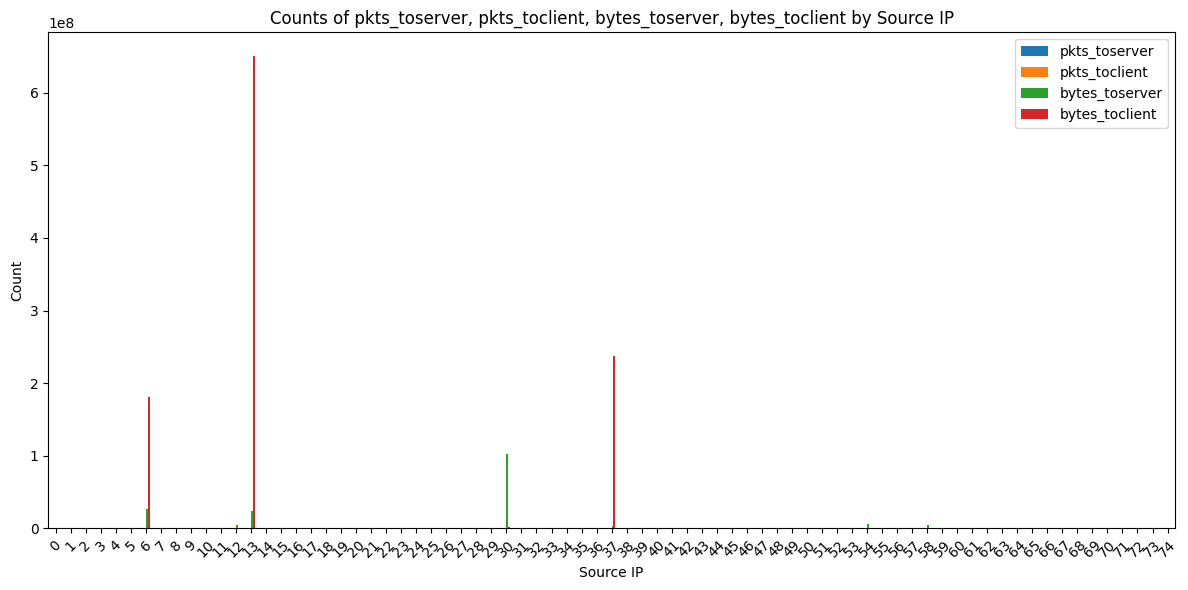

In [46]:
counts_by_source_ip.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Source IP')
plt.ylabel('Count')
plt.title('Counts of pkts_toserver, pkts_toclient, bytes_toserver, bytes_toclient by Source IP')
plt.legend(['pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

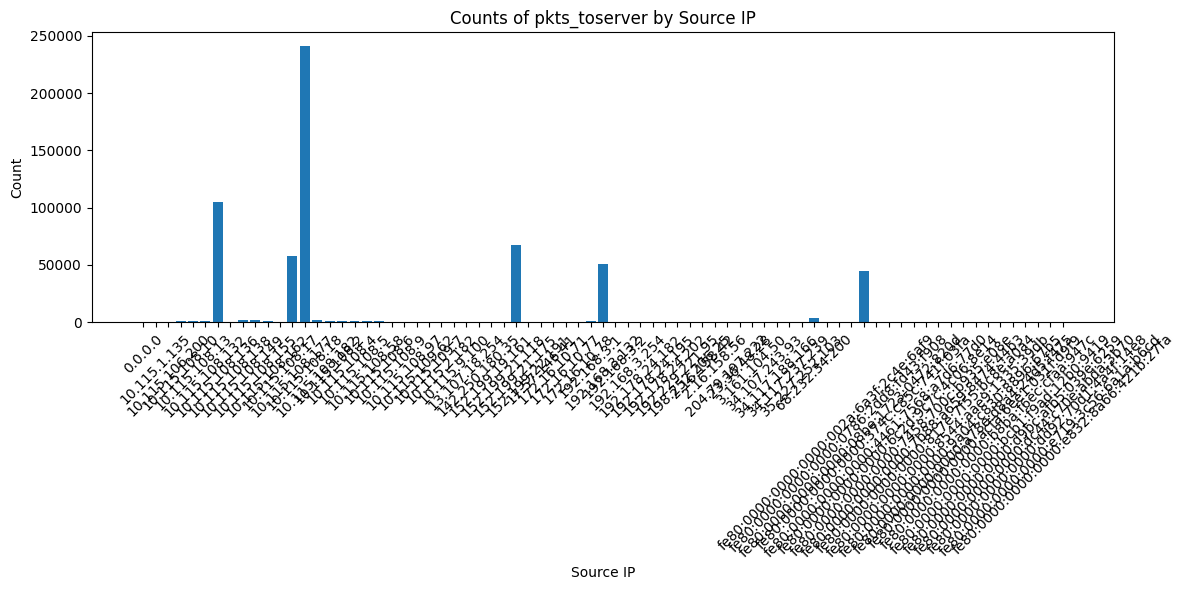

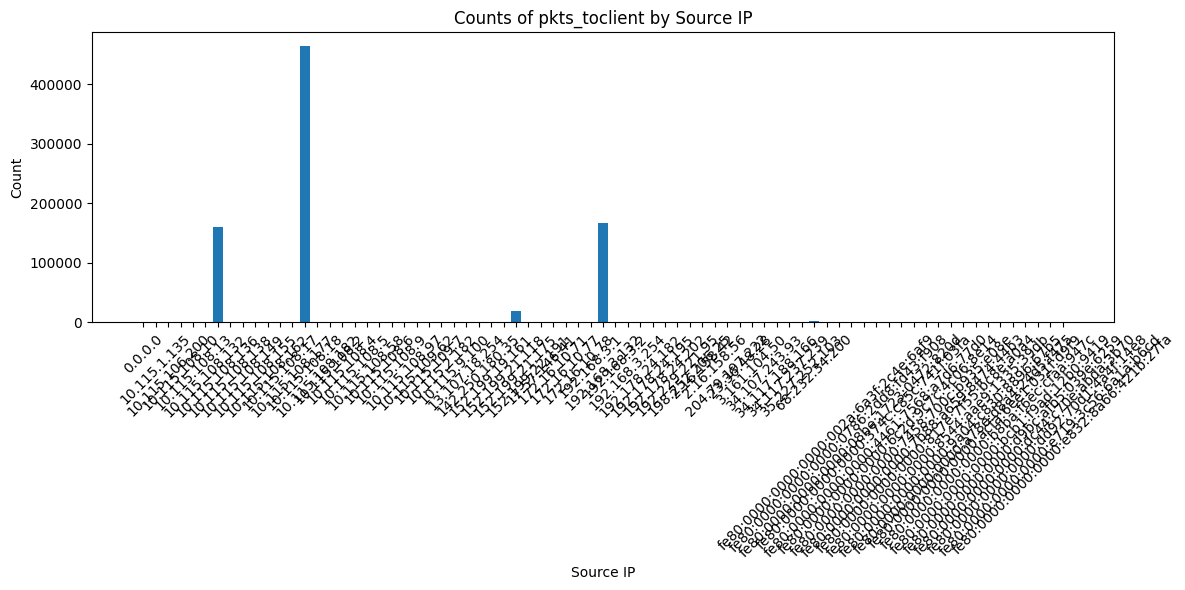

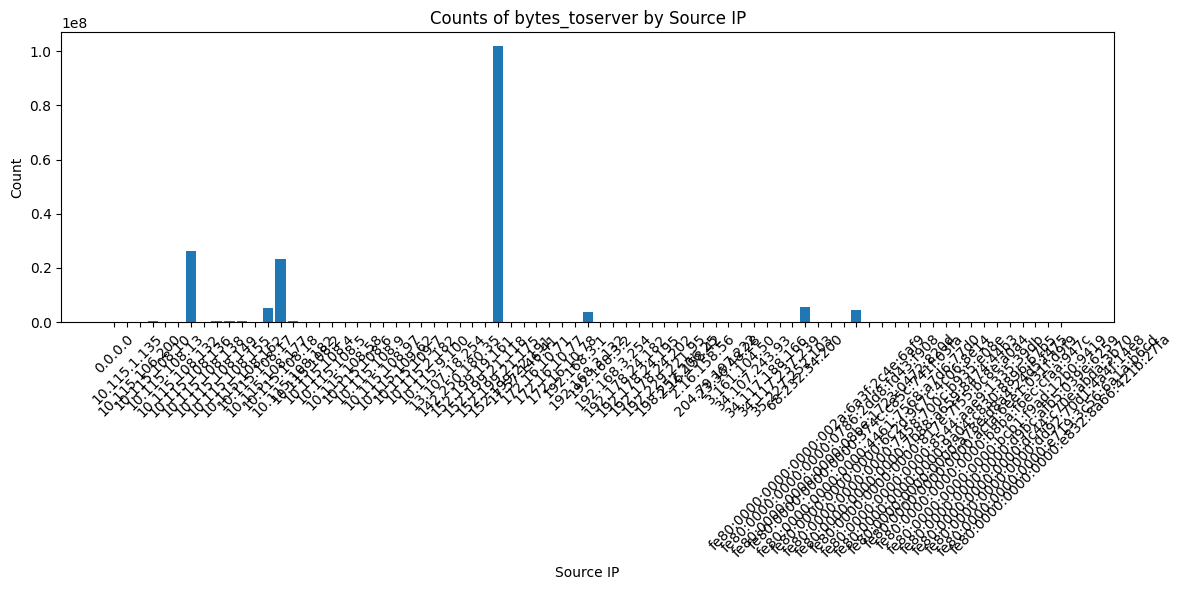

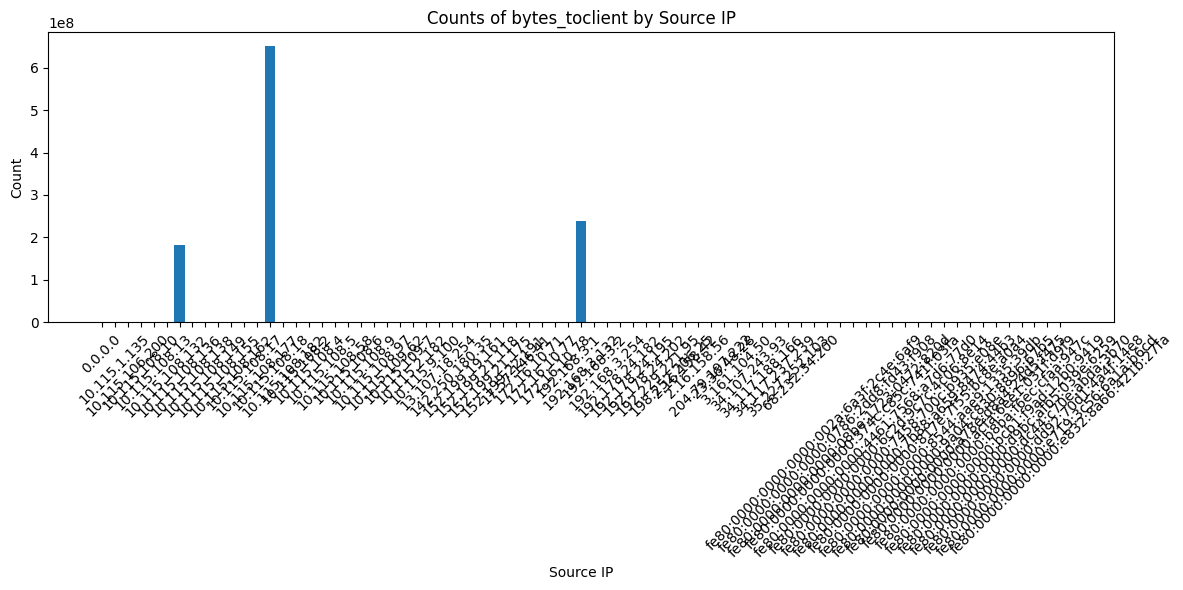

In [47]:
import matplotlib.pyplot as plt

# Loop through each count and create separate bar plots
for column in ['pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient']:
    plt.figure(figsize=(12, 6))
    plt.bar(counts_by_source_ip['Source_IP'], counts_by_source_ip[column])
    plt.xlabel('Source IP')
    plt.ylabel('Count')
    plt.title(f'Counts of {column} by Source IP')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


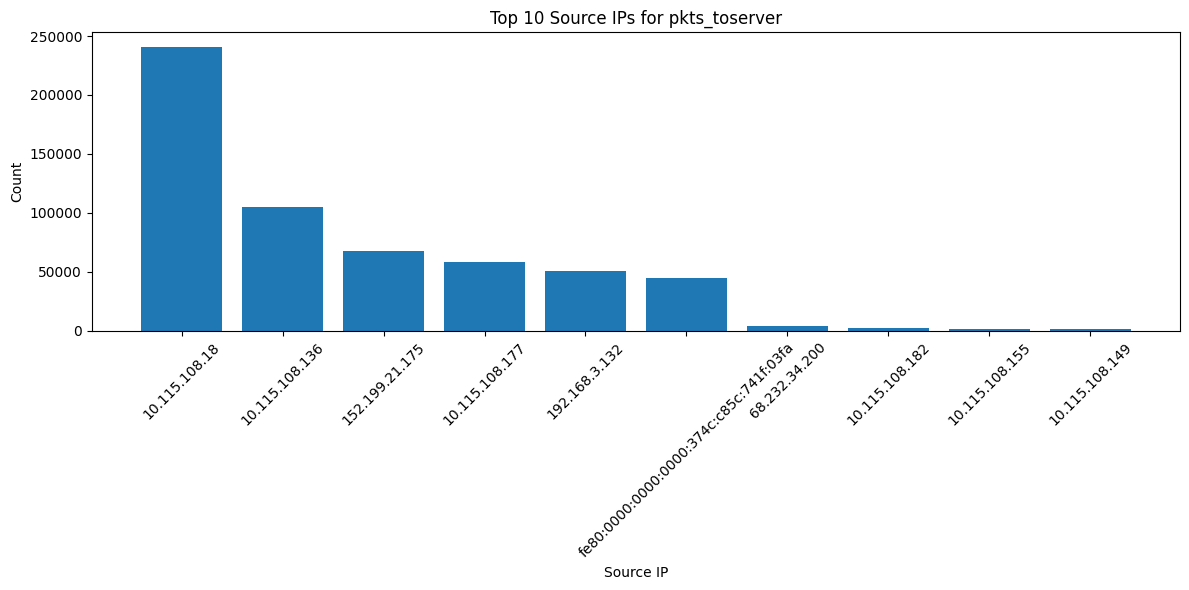

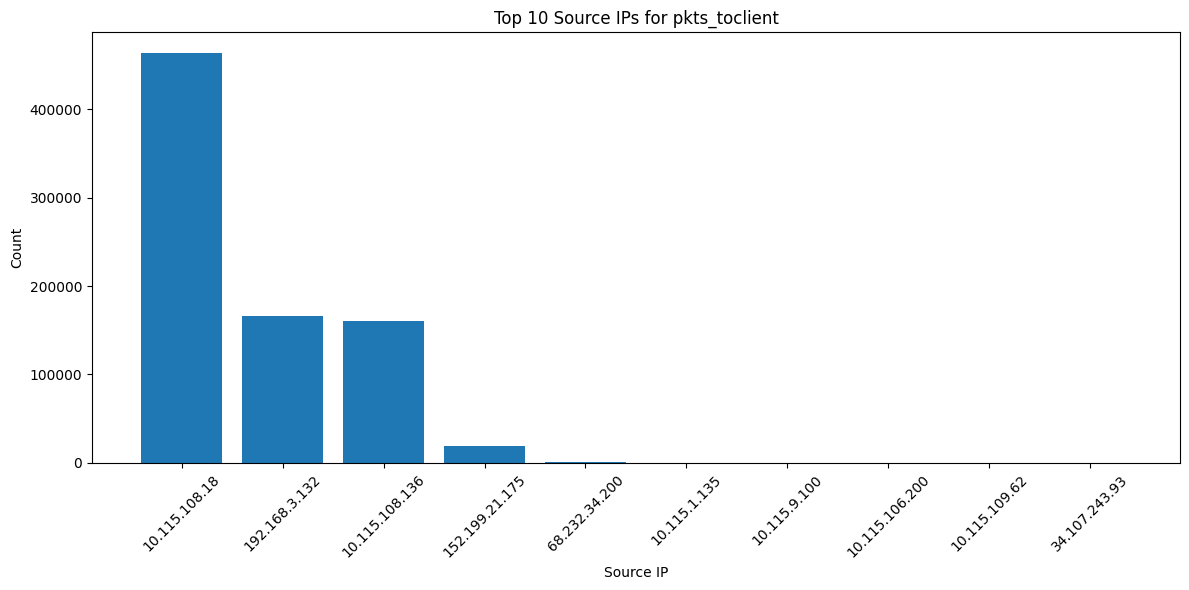

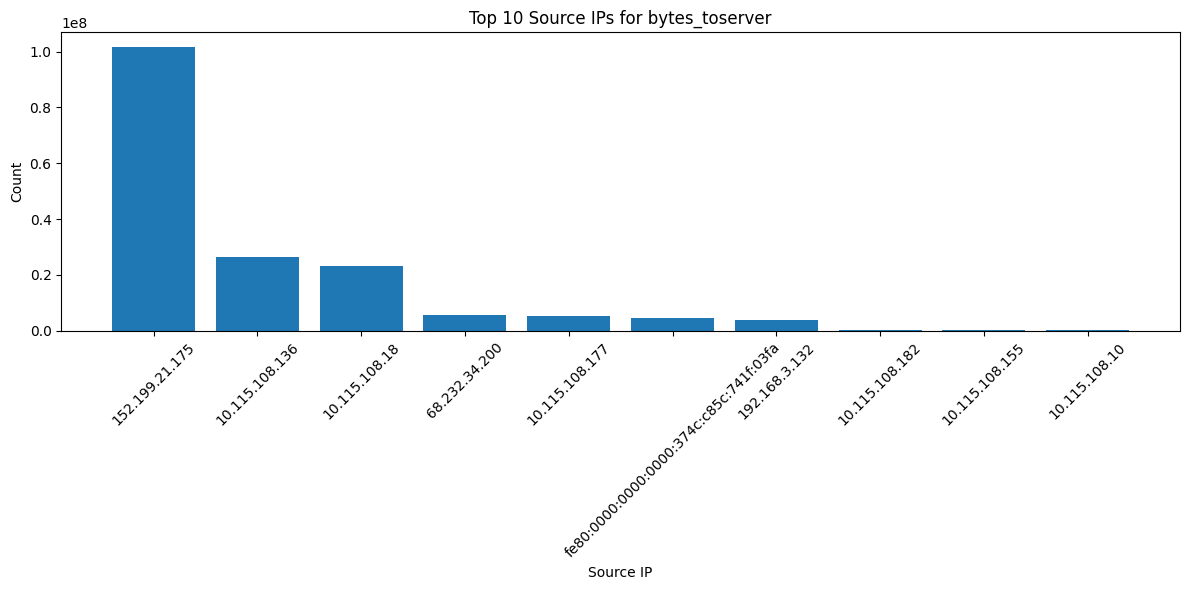

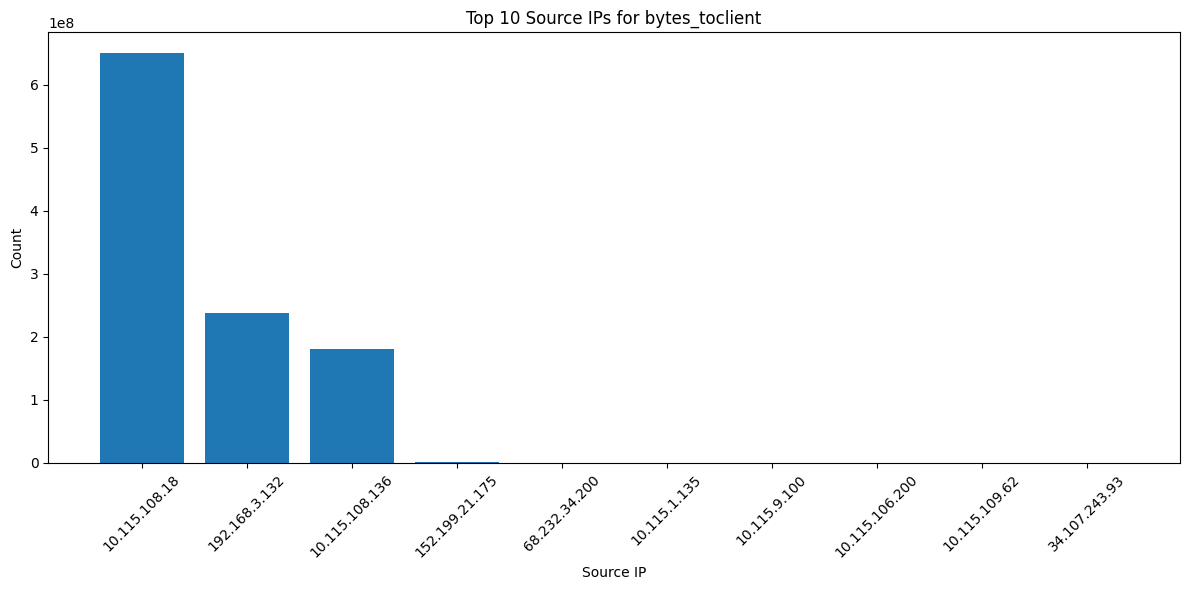

In [48]:
import matplotlib.pyplot as plt

# Define the count columns
count_columns = ['pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient']

# Plot separate bar plots for top 10 Source IPs for each count column
for column in count_columns:
    # Sort the DataFrame by the count column
    sorted_counts = counts_by_source_ip.sort_values(by=column, ascending=False)
    
    # Select the top 10 Source IPs
    top_10_source_ips = sorted_counts.head(10)
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(top_10_source_ips['Source_IP'], top_10_source_ips[column])
    plt.xlabel('Source IP')
    plt.ylabel('Count')
    plt.title(f'Top 10 Source IPs for {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [49]:
counts_by_source_ip

,Source_IP,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient
0,0.0.0.0,20,0,6980,0
1,10.115.1.135,84,84,5544,5040
2,10.115.106.200,61,61,4026,3660
3,10.115.108.10,1428,0,286810,0
4,10.115.108.13,1176,0,229737,0
...,...,...,...,...,...
70,fe80:0000:0000:0000:d9bc:afb5:039e:6259,106,0,11961,0
71,fe80:0000:0000:0000:dc44:c70e:abda:3b70,40,0,13425,0
72,fe80:0000:0000:0000:dd92:70d1:4a4f:14e8,129,0,16689,0
73,fe80:0000:0000:0000:e719:3c56:6a1a:b6cd,28,0,5074,0


In [50]:
flow.head()

,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient,start,end,age,state,reason,alerted,Flow_ID,Source_IP,Source_port,Destination_IP,Destination_port,protocol
0,1,0,82,0,2024-02-06T03:50:19.028531-0800,2024-02-06T03:50:19.028531-0800,0,new,timeout,False,966966916233670,10.115.108.136,58518.0,255.255.255.255,1947.0,UDP
1,1,0,82,0,2024-02-06T03:50:19.028509-0800,2024-02-06T03:50:19.028509-0800,0,new,timeout,False,966870695915051,10.115.108.136,58515.0,10.115.108.255,1947.0,UDP
2,1,0,217,0,2024-02-06T03:50:19.645434-0800,2024-02-06T03:50:19.645434-0800,0,new,timeout,False,1083270908666636,10.115.108.4,64778.0,239.255.255.250,1900.0,UDP
3,4,0,868,0,2024-02-06T03:50:23.182583-0800,2024-02-06T03:50:26.188979-0800,3,new,timeout,False,2191565829501581,10.115.108.162,52278.0,239.255.255.250,1900.0,UDP
4,4,0,872,0,2024-02-06T03:50:23.167810-0800,2024-02-06T03:50:26.174027-0800,3,new,timeout,False,2128115162280932,10.115.108.162,52275.0,239.255.255.250,1900.0,UDP


In [51]:
flow_alert_true=flow[flow['alerted']==True]
flow_alert_true.head()

,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient,start,end,age,state,reason,alerted,Flow_ID,Source_IP,Source_port,Destination_IP,Destination_port,protocol
211,9,8,1247,1214,2024-02-06T03:55:25.460181-0800,2024-02-06T03:55:27.102515-0800,2,closed,timeout,True,1413516390768388,10.115.108.18,37276.0,91.189.91.39,80.0,TCP
213,6,3,630,430,2024-02-06T03:55:25.506533-0800,2024-02-06T03:55:27.039967-0800,2,closed,timeout,True,1612596627649122,10.115.108.18,54488.0,185.125.190.80,80.0,TCP
216,7,5,620,2321,2024-02-06T03:55:28.900714-0800,2024-02-06T03:55:29.849431-0800,1,closed,timeout,True,209362599366429,10.115.108.18,37292.0,91.189.91.39,80.0,TCP
221,9,8,1247,1214,2024-02-06T03:55:33.089439-0800,2024-02-06T03:55:34.495707-0800,1,closed,timeout,True,1510039999600422,10.115.108.18,38048.0,91.189.91.38,80.0,TCP
222,6,4,620,498,2024-02-06T03:55:25.505581-0800,2024-02-06T03:55:26.992239-0800,1,closed,timeout,True,1608504536721205,10.115.108.18,54964.0,185.125.190.36,80.0,TCP


In [52]:
flow_alert_false=flow[flow['alerted']==False]
flow_alert_false.head()

,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient,start,end,age,state,reason,alerted,Flow_ID,Source_IP,Source_port,Destination_IP,Destination_port,protocol
0,1,0,82,0,2024-02-06T03:50:19.028531-0800,2024-02-06T03:50:19.028531-0800,0,new,timeout,False,966966916233670,10.115.108.136,58518.0,255.255.255.255,1947.0,UDP
1,1,0,82,0,2024-02-06T03:50:19.028509-0800,2024-02-06T03:50:19.028509-0800,0,new,timeout,False,966870695915051,10.115.108.136,58515.0,10.115.108.255,1947.0,UDP
2,1,0,217,0,2024-02-06T03:50:19.645434-0800,2024-02-06T03:50:19.645434-0800,0,new,timeout,False,1083270908666636,10.115.108.4,64778.0,239.255.255.250,1900.0,UDP
3,4,0,868,0,2024-02-06T03:50:23.182583-0800,2024-02-06T03:50:26.188979-0800,3,new,timeout,False,2191565829501581,10.115.108.162,52278.0,239.255.255.250,1900.0,UDP
4,4,0,872,0,2024-02-06T03:50:23.167810-0800,2024-02-06T03:50:26.174027-0800,3,new,timeout,False,2128115162280932,10.115.108.162,52275.0,239.255.255.250,1900.0,UDP


In [53]:
print('Counts of Events having Alerts:',len(flow_alert_true))
print('Counts of Events having No Alerts:',len(flow_alert_false))

Counts of Events having Alerts: 112
Counts of Events having No Alerts: 35415


In [54]:
unique_flows=flow['Flow_ID'].unique


In [55]:

# Count the number of unique flow IDs
unique_flow_ids_alert_true = flow_alert_true['Flow_ID'].nunique()
unique_flow_ids_alert_false = flow_alert_false['Flow_ID'].nunique()
print("Number of unique flow IDs where alerted is True:", unique_flow_ids_alert_true)
print("Number of unique flow IDs where alerted is False:", unique_flow_ids_alert_false)

Number of unique flow IDs where alerted is True: 112
Number of unique flow IDs where alerted is False: 35415


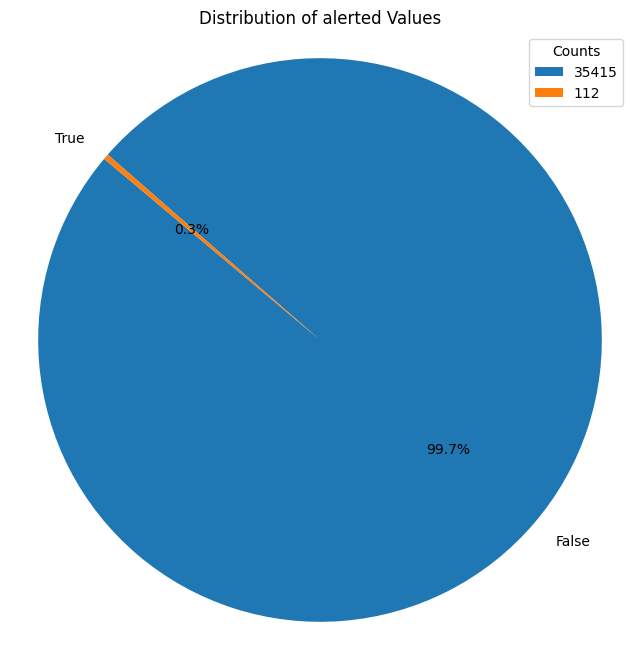

In [56]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'alerted' column
alerted_counts = flow['alerted'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(alerted_counts, labels=alerted_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(alerted_counts, title="Counts", loc="upper right")

plt.title('Distribution of alerted Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

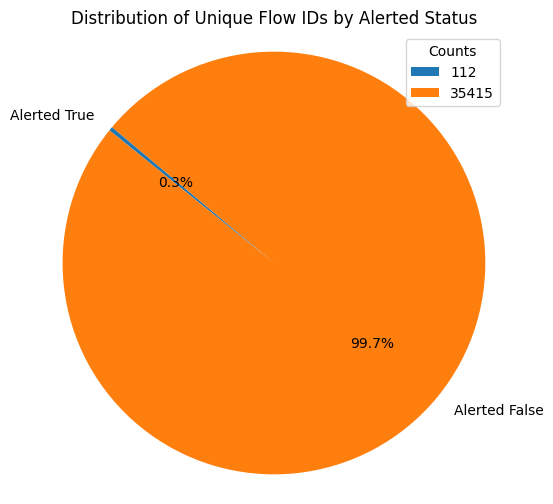

In [57]:
import matplotlib.pyplot as plt

# Count the number of unique flow IDs where 'alerted' is True and False
unique_flow_ids_alert_true = flow_alert_true['Flow_ID'].nunique()
unique_flow_ids_alert_false = flow_alert_false['Flow_ID'].nunique()

# Create labels for the pie chart
labels = ['Alerted True', 'Alerted False']

# Create data for the pie chart
sizes = [unique_flow_ids_alert_true, unique_flow_ids_alert_false]

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figsize to make the image smaller
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Flow IDs by Alerted Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(sizes, title="Counts", loc="upper right")


# Show the pie chart
plt.show()


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Load the dataset
data = pd.read_csv("newdata.csv")
data.dropna(inplace=True)
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'protocol' column
data['protocol'] = label_encoder.fit_transform(data['protocol'])
# Define features and target variable
features = ['pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient', 'Source_port', 'Destination_port', 'Duration','protocol']
target = 'alerted'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9988741908246552

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      7080
        True       0.91      0.77      0.83        26

    accuracy                           1.00      7106
   macro avg       0.95      0.88      0.92      7106
weighted avg       1.00      1.00      1.00      7106



In [60]:
import pandas as pd
from sklearn.ensemble import IsolationForest

data = pd.read_csv("newdata.csv")
data.dropna(inplace=True)
label_encoder = LabelEncoder()

# Fit and transform the 'protocol' column
data['protocol'] = label_encoder.fit_transform(data['protocol'])
# Define features
features = ['pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient', 'Source_port', 'Destination_port', 'Duration','protocol']

# Initialize and fit the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
clf.fit(data[features])

# Predict anomalies (1 for normal, -1 for anomalies)
predictions = clf.predict(data[features])

# Identify anomalies
anomalies = data[predictions == -1]

# Print the detected anomalies
print("Detected anomalies:")
print(anomalies)


c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Detected anomalies:
       Unnamed: 0  pkts_toserver  pkts_toclient  bytes_toserver  \
12             13              5              0             539   
16             17              3              1             180   
18             19              2              2             120   
21             22              1              0             147   
50             52             18              0            1656   
...           ...            ...            ...             ...   
35513       35793             12              0             900   
35517       35797             12              0            1140   
35523       35803              6              0            1080   
35524       35804              6              0             960   
35526       35806              6              5             431   

       bytes_toclient                             start  \
12                  0  2024-02-06 11:51:06.370709+00:00   
16                 60  2024-02-06 11:50:28.316569+00:00  

In [62]:
anomalies.head(50)

,Unnamed: 0,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient,start,end,age,state,reason,alerted,Flow_ID,Source_IP,Source_port,Destination_IP,Destination_port,protocol,Duration
12,13,5,0,539,0,2024-02-06 11:51:06.370709+00:00,2024-02-06 11:51:06.419179+00:00,0,new,timeout,False,747761921196345,10.115.108.136,5353,224.0.0.251,5353,1,0.048470
16,17,3,1,180,60,2024-02-06 11:50:28.316569+00:00,2024-02-06 11:50:39.556435+00:00,11,new,timeout,False,1359654343742360,10.115.108.136,64138,23.96.124.68,443,0,11.239866
18,19,2,2,120,120,2024-02-06 11:50:28.624956+00:00,2024-02-06 11:50:39.782474+00:00,11,new,timeout,False,1276790767039046,10.115.108.136,64139,23.96.124.68,443,0,11.157518
21,22,1,0,147,0,2024-02-06 11:50:53.339326+00:00,2024-02-06 11:50:53.339326+00:00,0,new,timeout,False,1457394933997727,152.199.22.191,443,10.115.108.9,42746,0,0.000000
50,52,18,0,1656,0,2024-02-06 11:51:37.399784+00:00,2024-02-06 11:51:53.956153+00:00,16,new,timeout,False,309685220783650,10.115.108.4,137,10.115.108.255,137,1,16.556369
52,54,30,0,2424,0,2024-02-06 11:51:34.717795+00:00,2024-02-06 11:51:53.035538+00:00,19,new,timeout,False,1957007783084921,10.115.108.4,5353,224.0.0.251,5353,1,18.317743
54,56,30,0,3024,0,2024-02-06 11:51:34.719495+00:00,2024-02-06 11:51:53.035551+00:00,19,new,timeout,False,1964309979450729,fe80:0000:0000:0000:e832:8a66:421b:27fa,5353,ff02:0000:0000:0000:0000:0000:0000:00fb,5353,1,18.316056
56,58,1,0,127,0,2024-02-06 11:51:22.905417+00:00,2024-02-06 11:51:22.905417+00:00,0,new,timeout,False,792514100870993,198.252.206.25,443,10.115.108.9,46856,0,0.000000
60,62,13,12,3678,6527,2024-02-06 11:50:39.600219+00:00,2024-02-06 11:51:40.784007+00:00,61,closed,timeout,False,2014974354936727,10.115.108.136,64141,23.96.124.68,443,0,61.183788
62,64,11,11,2767,6150,2024-02-06 11:50:39.821618+00:00,2024-02-06 11:51:40.788792+00:00,61,closed,timeout,False,2121451417012219,10.115.108.136,64142,23.96.124.68,443,0,60.967174


In [63]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

data = pd.read_csv("newdata.csv")
data.dropna(inplace=True)
label_encoder = LabelEncoder()

# Fit and transform the 'protocol' column
data['protocol'] = label_encoder.fit_transform(data['protocol'])
# Define features
features = ['pkts_toserver', 'pkts_toclient', 'bytes_toserver', 'bytes_toclient', 'Source_port', 'Destination_port', 'Duration','protocol']

# Initialize and fit the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed
outlier_scores = lof.fit_predict(data[features])

# Identify anomalies (outliers)
anomalies = data[outlier_scores == -1]

# Print the detected anomalies
print("Detected anomalies:")
print(anomalies)


Detected anomalies:
       Unnamed: 0  pkts_toserver  pkts_toclient  bytes_toserver  \
0               0              1              0              82   
1               1              1              0              82   
13             14              1              0              75   
14             15              1              0              95   
16             17              3              1             180   
...           ...            ...            ...             ...   
35512       35792              1              0              92   
35521       35801              1              0              92   
35522       35802              1              0              82   
35525       35805              1              0              82   
35526       35806              6              5             431   

       bytes_toclient                             start  \
0                   0  2024-02-06 11:50:19.028531+00:00   
1                   0  2024-02-06 11:50:19.028509+00:00  

In [64]:
anomalies.head(50)

,Unnamed: 0,pkts_toserver,pkts_toclient,bytes_toserver,bytes_toclient,start,end,age,state,reason,alerted,Flow_ID,Source_IP,Source_port,Destination_IP,Destination_port,protocol,Duration
0,0,1,0,82,0,2024-02-06 11:50:19.028531+00:00,2024-02-06 11:50:19.028531+00:00,0,new,timeout,False,966966916233670,10.115.108.136,58518,255.255.255.255,1947,1,0.000000
1,1,1,0,82,0,2024-02-06 11:50:19.028509+00:00,2024-02-06 11:50:19.028509+00:00,0,new,timeout,False,966870695915051,10.115.108.136,58515,10.115.108.255,1947,1,0.000000
13,14,1,0,75,0,2024-02-06 11:51:06.371777+00:00,2024-02-06 11:51:06.371777+00:00,0,new,timeout,False,752345735089450,10.115.108.136,57458,224.0.0.252,5355,1,0.000000
14,15,1,0,95,0,2024-02-06 11:51:06.371724+00:00,2024-02-06 11:51:06.371724+00:00,0,new,timeout,False,752117852657230,fe80:0000:0000:0000:7b88:a659:8474:44b3,57458,ff02:0000:0000:0000:0000:0000:0001:0003,5355,1,0.000000
16,17,3,1,180,60,2024-02-06 11:50:28.316569+00:00,2024-02-06 11:50:39.556435+00:00,11,new,timeout,False,1359654343742360,10.115.108.136,64138,23.96.124.68,443,0,11.239866
18,19,2,2,120,120,2024-02-06 11:50:28.624956+00:00,2024-02-06 11:50:39.782474+00:00,11,new,timeout,False,1276790767039046,10.115.108.136,64139,23.96.124.68,443,0,11.157518
23,24,6,0,1074,0,2024-02-06 11:51:06.366096+00:00,2024-02-06 11:51:21.401642+00:00,15,new,timeout,False,727948425190614,10.115.108.136,54872,239.255.255.250,1900,1,15.035546
25,26,1,0,75,0,2024-02-06 11:51:34.719765+00:00,2024-02-06 11:51:34.719765+00:00,0,new,timeout,False,1965470080815736,10.115.108.4,52132,224.0.0.252,5355,1,0.000000
27,28,1,0,95,0,2024-02-06 11:51:34.719768+00:00,2024-02-06 11:51:34.719768+00:00,0,new,timeout,False,1965482194252217,fe80:0000:0000:0000:e832:8a66:421b:27fa,52132,ff02:0000:0000:0000:0000:0000:0001:0003,5355,1,0.000000
30,31,1,0,75,0,2024-02-06 11:51:34.718871+00:00,2024-02-06 11:51:34.718871+00:00,0,new,timeout,False,1961628623060966,10.115.108.4,63524,224.0.0.252,5355,1,0.000000


In [65]:
import pandas as pd

data = pd.read_csv("newdata.csv")
data.dropna(inplace=True)
label_encoder = LabelEncoder()

# Fit and transform the 'protocol' column
data['protocol'] = label_encoder.fit_transform(data['protocol'])

# Assuming the dataset contains features like 'Source_IP', 'Destination_IP', 'Duration', etc.

# Calculate the total duration of each entity (e.g., Source_IP)
entity_duration = data.groupby('Source_IP')['Duration'].sum()

# Calculate the average duration of each entity
entity_avg_duration = data.groupby('Source_IP')['Duration'].mean()

# Identify entities with unusual behavior (e.g., high average duration)
anomalies = entity_avg_duration[entity_avg_duration > entity_avg_duration.quantile(0.95)]

# Print the entities with unusual behavior
print("Entities with unusual behavior (high average duration):")
print(anomalies)


Entities with unusual behavior (high average duration):
Source_IP
152.199.21.175    1760.015580
34.117.237.239      61.187311
35.227.252.103      60.950912
68.232.34.200      276.874125
Name: Duration, dtype: float64


In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

data = pd.read_csv("newdata.csv")
data.dropna(inplace=True)
label_encoder = LabelEncoder()

# Fit and transform the 'protocol' column
data['protocol'] = label_encoder.fit_transform(data['protocol'])
# Assuming the dataset contains features like 'Source_IP', 'Destination_IP', 'Duration', etc.

# Feature Engineering: Calculate relevant features
data['total_bytes'] = data['bytes_toserver'] + data['bytes_toclient']
data['total_pkts'] = data['pkts_toserver'] + data['pkts_toclient']

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['total_bytes', 'total_pkts', 'Duration','protocol']])

# Clustering: Identify clusters of similar entities (e.g., Source_IP)
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Anomaly Detection: Detect anomalies within each cluster
anomalies = []
for cluster_id in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster_id][['total_bytes', 'total_pkts', 'Duration']]
    clf = IsolationForest(contamination=0.1, random_state=42)
    cluster_data['anomaly_score'] = clf.fit_predict(cluster_data)
    cluster_anomalies = cluster_data[cluster_data['anomaly_score'] == -1]
    anomalies.extend(cluster_anomalies.index.tolist())

# Print the detected anomalies
print("Detected anomalies:")
print(data.loc[anomalies])


c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.

Detected anomalies:
       Unnamed: 0  pkts_toserver  pkts_toclient  bytes_toserver  \
11             12              4              0             480   
12             13              5              0             539   
23             24              6              0            1074   
50             52             18              0            1656   
52             54             30              0            2424   
...           ...            ...            ...             ...   
35029       35284           1337           3157           74108   
35046       35301             90            146            5054   
35067       35322           1437           7841           77829   
18761       18897          13662          23502         3675828   
4573         4603          67657          19038       101830712   

       bytes_toclient                             start  \
11                  0  2024-02-06 11:51:06.371162+00:00   
12                  0  2024-02-06 11:51:06.370709+00:00  

c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

data = pd.read_csv("newdata.csv")
data.dropna(inplace=True)
label_encoder = LabelEncoder()

# Fit and transform the 'protocol' column
data['protocol'] = label_encoder.fit_transform(data['protocol'])
# Assuming the dataset contains features like 'Source_IP', 'Destination_IP', 'Duration', etc.

# Feature Engineering: Calculate relevant features
data['total_bytes'] = data['bytes_toserver'] + data['bytes_toclient']
data['total_pkts'] = data['pkts_toserver'] + data['pkts_toclient']

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['total_bytes', 'total_pkts', 'Duration','protocol']])

# Prepare sequences for LSTM
sequence_length = 10  # Define the sequence length
sequences = []
for i in range(len(scaled_data) - sequence_length):
    sequence = scaled_data[i:i+sequence_length]
    sequences.append(sequence)
sequences = np.array(sequences)

# Define train and test sets
train_size = int(0.8 * len(sequences))
X_train, y_train = sequences[:train_size], sequences[:train_size]
X_test, y_test = sequences[train_size:], sequences[train_size:]

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dense(X_train.shape[2])  # Output layer without activation function
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)


Epoch 1/50
711/711 [==============================] - 12s 12ms/step - loss: 0.2175 - val_loss: 0.0056
Epoch 2/50
711/711 [==============================] - 8s 11ms/step - loss: 0.0044 - val_loss: 0.0017
Epoch 3/50
711/711 [==============================] - 8s 11ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 4/50
711/711 [==============================] - 8s 11ms/step - loss: 0.0020 - val_loss: 6.3584e-04
Epoch 5/50
711/711 [==============================] - 8s 11ms/step - loss: 0.0012 - val_loss: 4.4646e-04
Epoch 6/50
711/711 [==============================] - 8s 11ms/step - loss: 0.0010 - val_loss: 3.1225e-04
Epoch 7/50
711/711 [==============================] - 8s 11ms/step - loss: 0.0013 - val_loss: 2.7790e-04
Epoch 8/50
711/711 [==============================] - 8s 11ms/step - loss: 6.0634e-04 - val_loss: 2.1514e-04
Epoch 9/50
711/711 [==============================] - 8s 11ms/step - loss: 6.7905e-04 - val_loss: 3.2679e-04
Epoch 10/50
711/711 [==============================] - 8s 

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("newdata.csv")
data.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['protocol'] = label_encoder.fit_transform(data['protocol'])

# Feature Engineering: Calculate relevant features
data['total_bytes'] = data['bytes_toserver'] + data['bytes_toclient']
data['total_pkts'] = data['pkts_toserver'] + data['pkts_toclient']

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['total_bytes', 'total_pkts', 'Duration', 'protocol']])

# Prepare sequences for the CNN-LSTM model
sequence_length = 10  # Define the sequence length
sequences = []
for i in range(len(scaled_data) - sequence_length):
    sequence = scaled_data[i:i+sequence_length]
    sequences.append(sequence)
sequences = np.array(sequences)

# Define train and test sets
train_size = int(0.8 * len(sequences))
X_train, y_train = sequences[:train_size], scaled_data[sequence_length:train_size+sequence_length]
X_test, y_test = sequences[train_size:], scaled_data[train_size+sequence_length:]

# Define the CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='relu', return_sequences=True),
    Flatten(),
    Dense(10),  # Adjust the units to match the sequence length
    Dense(X_train.shape[2])  # Output layer without activation function
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Test MSE:", mse)


Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/mean_squared_error/BroadcastGradientArgs' defined at (most recent call last):
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Tajummal\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Tajummal\AppData\Local\Temp\ipykernel_639228\4212620414.py", line 61, in <module>
      history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer.py", line 542, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "c:\Users\Tajummal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer.py", line 275, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/mean_squared_error/BroadcastGradientArgs'
Incompatible shapes: [32,4] vs. [32,10,4]
	 [[{{node gradient_tape/mean_squared_error/BroadcastGradientArgs}}]] [Op:__inference_train_function_90948]